In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=100,
    epoch=500, patience=20
)

---

# Smart-seq2

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,channel,cluster,dataset_name,donor,free_annotation,gender,organ,platform,region
A21.MAA000594.3_8_M.1.1,fibroblast,CL:0000057,fibroblast,MAA000594,3.0,Quake_Smart-seq2,3_8_M,fibroblasts,M,Aorta,Smart-seq2,
F8.MAA000594.3_8_M.1.1,erythrocyte,CL:0000232,erythrocyte,MAA000594,0.0,Quake_Smart-seq2,3_8_M,red blood cells,M,Aorta,Smart-seq2,
H11.MAA000594.3_8_M.1.1,erythrocyte,CL:0000232,erythrocyte,MAA000594,0.0,Quake_Smart-seq2,3_8_M,red blood cells,M,Aorta,Smart-seq2,
A22.MAA000594.3_8_M.1.1,professional antigen presenting cell,CL:0000145,professional antigen presenting cell,MAA000594,4.0,Quake_Smart-seq2,3_8_M,antigen presenting cells,M,Aorta,Smart-seq2,
D4.MAA000594.3_8_M.1.1,fibroblast,CL:0000057,fibroblast,MAA000594,3.0,Quake_Smart-seq2,3_8_M,fibroblasts,M,Aorta,Smart-seq2,


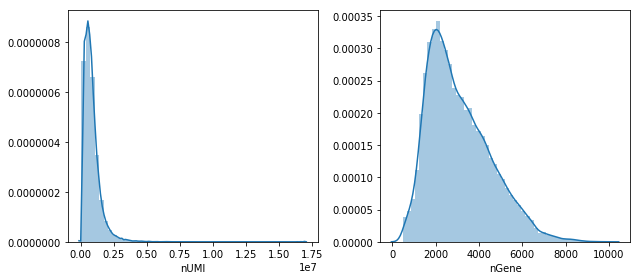

In [2]:
quake_smart_seq2 = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_Smart-seq2/data.h5")
utils.peek(quake_smart_seq2, "Quake_Smart-seq2")
quake_smart_seq2 = quake_smart_seq2.normalize()
quake_smart_seq2.obs.head()

In [3]:
opt_model_kwargs = dict(h_dim=512, prob_module_kwargs=dict(lambda_reg=0.001))
quake_smart_seq2_model = cb.directi.fit_DIRECTi(
    quake_smart_seq2, quake_smart_seq2.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Quake_Smart-seq2/model_0"
)
quake_smart_seq2.latent = quake_smart_seq2_model.inference(quake_smart_seq2)

[DIRECTi epoch 0] train=1.209, val=0.478, time elapsed=4.4s Best save...
[DIRECTi epoch 1] train=0.435, val=0.412, time elapsed=3.8s Best save...
[DIRECTi epoch 2] train=0.393, val=0.383, time elapsed=3.7s Best save...
[DIRECTi epoch 3] train=0.373, val=0.376, time elapsed=3.7s Best save...
[DIRECTi epoch 4] train=0.362, val=0.367, time elapsed=3.7s Best save...
[DIRECTi epoch 5] train=0.354, val=0.348, time elapsed=3.7s Best save...
[DIRECTi epoch 6] train=0.349, val=0.347, time elapsed=3.8s Best save...
[DIRECTi epoch 7] train=0.346, val=0.341, time elapsed=3.7s Best save...
[DIRECTi epoch 8] train=0.343, val=0.340, time elapsed=3.8s Best save...
[DIRECTi epoch 9] train=0.341, val=0.338, time elapsed=3.8s Best save...
[DIRECTi epoch 10] train=0.339, val=0.337, time elapsed=3.7s Best save...
[DIRECTi epoch 11] train=0.337, val=0.334, time elapsed=3.7s Best save...
[DIRECTi epoch 12] train=0.336, val=0.336, time elapsed=3.8s
[DIRECTi epoch 13] train=0.334, val=0.333, time elapsed=3.7s 

[  Info   ] Computing tSNE...


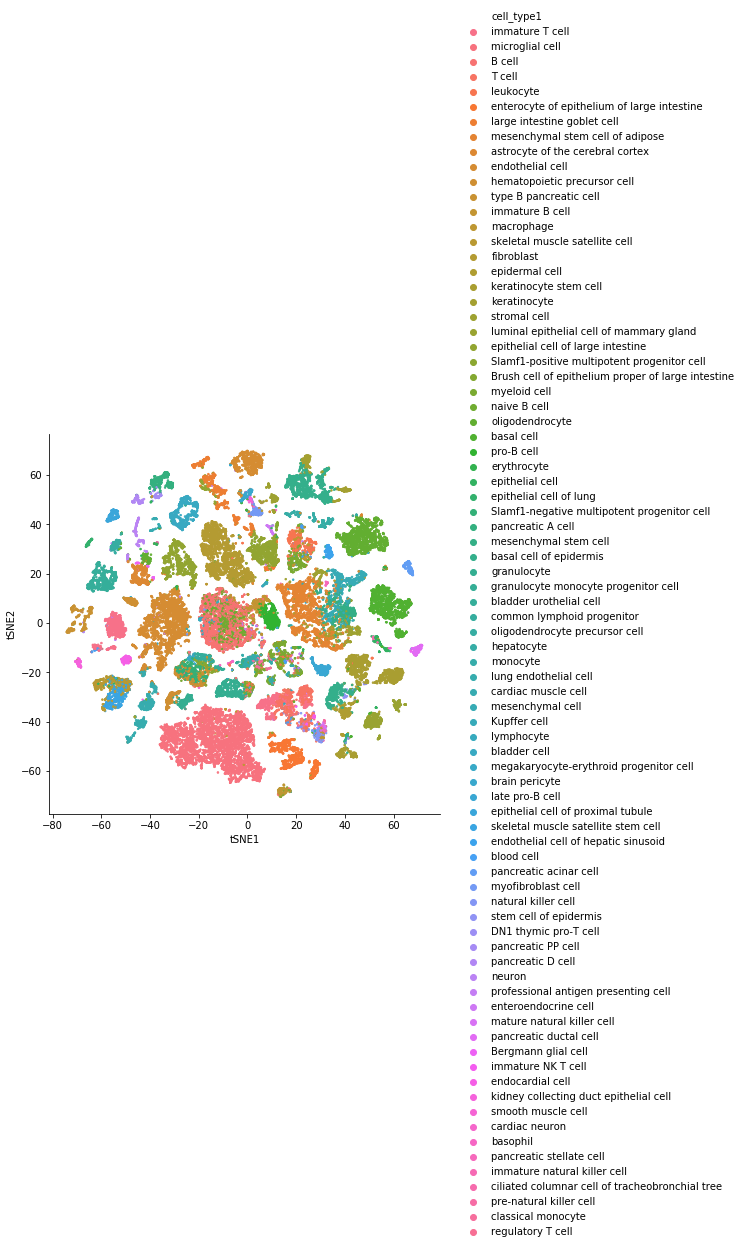

In [4]:
plot = quake_smart_seq2.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_Smart-seq2/cell_type1.pdf", bbox_inches="tight")

In [5]:
%%capture capio
quake_smart_seq2_models = [quake_smart_seq2_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_smart_seq2_models.append(cb.directi.fit_DIRECTi(
        quake_smart_seq2, quake_smart_seq2.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_Smart-seq2/model_%d" % i
    ))
quake_smart_seq2_blast = cb.blast.BLAST(
    quake_smart_seq2_models, quake_smart_seq2, keep_exprs=True
).build_empirical()
quake_smart_seq2_blast.save("Quake_Smart-seq2")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2/model_1/checkpoint-178
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2/model_2/checkpoint-88
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2/model_3/checkpoint-159


In [6]:
with open("Quake_Smart-seq2/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_Smart-seq2/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [7]:
utils.self_projection(quake_smart_seq2_blast, "Quake_Smart-seq2")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9565
Accuracy = 0.9463


---

# 10x

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,cluster,dataset_name,donor,free_annotation,gender,organ,plate,platform,region
10X_P4_3_AAAGTAGAGATGCCAG,bladder cell,CL:1001319,bladder cell,0.0,Quake_10x,3-M-8,Bladder mesenchymal cell,M,Bladder,10X_P4_3,10x,
10X_P4_3_AACCGCGTCCAACCAA,bladder cell,CL:1001319,bladder cell,2.0,Quake_10x,3-M-8,Bladder mesenchymal cell,M,Bladder,10X_P4_3,10x,
10X_P4_3_AACTCCCGTCGGGTCT,bladder cell,CL:1001319,bladder cell,5.0,Quake_10x,3-M-8,Bladder mesenchymal cell,M,Bladder,10X_P4_3,10x,
10X_P4_3_AACTCTTAGTTGCAGG,bladder urothelial cell,CL:1001428,bladder urothelial cell,3.0,Quake_10x,3-M-8,Luminal bladder epithelial cell,M,Bladder,10X_P4_3,10x,
10X_P4_3_AACTCTTTCATAACCG,bladder cell,CL:1001319,bladder cell,2.0,Quake_10x,3-M-8,Bladder mesenchymal cell,M,Bladder,10X_P4_3,10x,


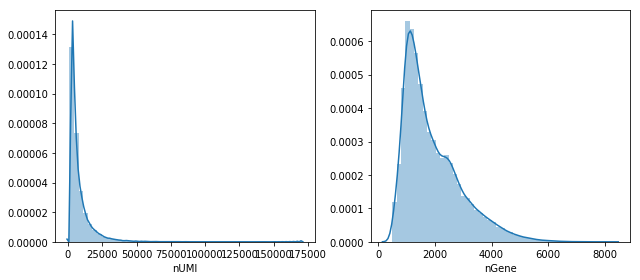

In [8]:
quake_10x = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_10x/data.h5")
utils.peek(quake_10x, "Quake_10x")
quake_10x = quake_10x.normalize()
quake_10x.obs.head()

In [9]:
opt_model_kwargs = dict(h_dim=512, prob_module_kwargs=dict(lambda_reg=0.001))
quake_10x_model = cb.directi.fit_DIRECTi(
    quake_10x, quake_10x.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Quake_10x/model_0"
)
quake_10x.latent = quake_10x_model.inference(quake_10x)

[DIRECTi epoch 0] train=0.949, val=0.459, time elapsed=5.1s Best save...
[DIRECTi epoch 1] train=0.415, val=0.396, time elapsed=4.4s Best save...
[DIRECTi epoch 2] train=0.390, val=0.387, time elapsed=4.5s Best save...
[DIRECTi epoch 3] train=0.380, val=0.374, time elapsed=4.4s Best save...
[DIRECTi epoch 4] train=0.373, val=0.369, time elapsed=4.4s Best save...
[DIRECTi epoch 5] train=0.368, val=0.365, time elapsed=4.4s Best save...
[DIRECTi epoch 6] train=0.365, val=0.365, time elapsed=4.4s Best save...
[DIRECTi epoch 7] train=0.362, val=0.362, time elapsed=4.4s Best save...
[DIRECTi epoch 8] train=0.360, val=0.361, time elapsed=4.4s Best save...
[DIRECTi epoch 9] train=0.358, val=0.359, time elapsed=4.4s Best save...
[DIRECTi epoch 10] train=0.357, val=0.357, time elapsed=4.4s Best save...
[DIRECTi epoch 11] train=0.356, val=0.356, time elapsed=4.4s Best save...
[DIRECTi epoch 12] train=0.355, val=0.355, time elapsed=4.3s Best save...
[DIRECTi epoch 13] train=0.354, val=0.354, time 

[  Info   ] Computing tSNE...


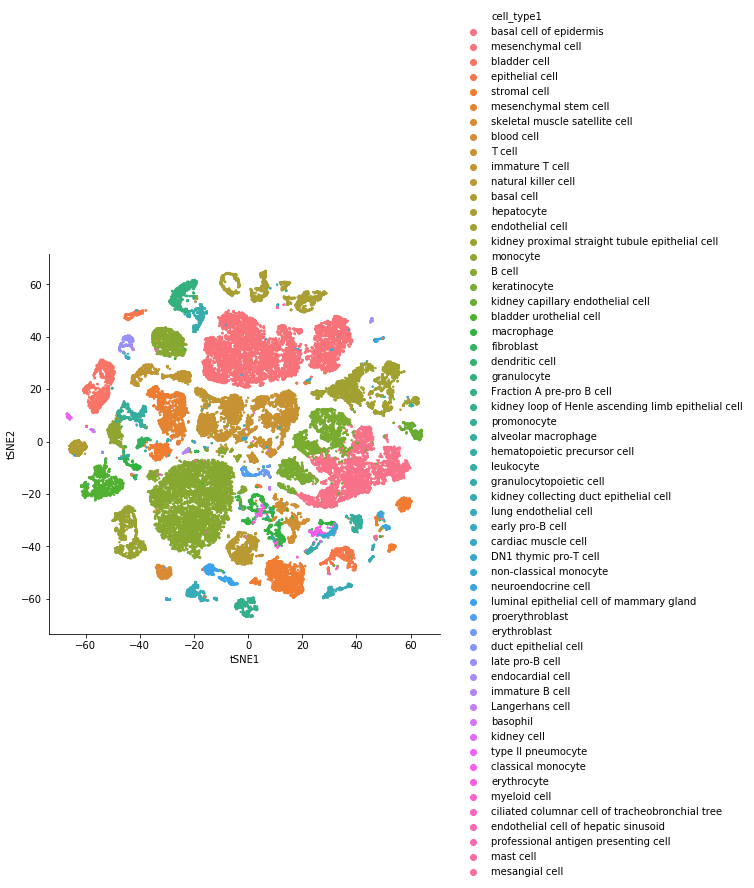

In [10]:
plot = quake_10x.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_10x/cell_type1.pdf", bbox_inches="tight")

In [11]:
%%capture capio
quake_10x_models = [quake_10x_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_10x_models.append(cb.directi.fit_DIRECTi(
        quake_10x, quake_10x.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_10x/model_%d" % i
    ))
quake_10x_blast = cb.blast.BLAST(
    quake_10x_models, quake_10x, keep_exprs=True
).build_empirical()
quake_10x_blast.save("Quake_10x")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x/model_1/checkpoint-139
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x/model_2/checkpoint-119
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x/model_3/checkpoint-149


In [12]:
with open("Quake_10x/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_10x/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [13]:
utils.self_projection(quake_10x_blast, "Quake_10x")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9915
Accuracy = 0.9848


---

# Aligned

In [14]:
if not os.path.exists("ALIGNED_Tabula_Muris"):
    os.makedirs("ALIGNED_Tabula_Muris")
tabula_muris = cb.data.ExprDataSet.merge_datasets({
    "Smart-seq2": quake_smart_seq2,
    "10x": quake_10x
}, merge_uns_slots=["seurat_genes"])

[  Info   ] Merging uns slots...
[  Info   ] Merging var data frame...
[  Info   ] Merging obs data frame...
[  Info   ] Merging expression matrix...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/Cell_BLAST/data.py:579: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  merged_obs = pd.concat(merged_obs)


In [15]:
opt_model_kwargs = dict(
    h_dim=512, batch_effect="dataset_name",
    prob_module_kwargs=dict(lambda_reg=0.001),
    rmbatch_module_kwargs=dict(lambda_reg=0.005)
)
tabula_muris_model = cb.directi.fit_DIRECTi(
    tabula_muris, tabula_muris.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/ALIGNED_Tabula_Muris/model_0"
)
tabula_muris.latent = tabula_muris_model.inference(tabula_muris)

[DIRECTi epoch 0] train=0.674, val=0.369, time elapsed=10.9s Regular save...
[DIRECTi epoch 1] train=0.352, val=0.341, time elapsed=10.2s
[DIRECTi epoch 2] train=0.336, val=0.333, time elapsed=10.3s
[DIRECTi epoch 3] train=0.329, val=0.333, time elapsed=10.2s
[DIRECTi epoch 4] train=0.325, val=0.325, time elapsed=10.2s
[DIRECTi epoch 5] train=0.322, val=0.323, time elapsed=10.3s
[DIRECTi epoch 6] train=0.320, val=0.320, time elapsed=10.3s
[DIRECTi epoch 7] train=0.318, val=0.319, time elapsed=10.4s
[DIRECTi epoch 8] train=0.317, val=0.318, time elapsed=10.3s
[DIRECTi epoch 9] train=0.316, val=0.317, time elapsed=10.4s
[DIRECTi epoch 10] train=0.315, val=0.317, time elapsed=10.2s Regular save...
[DIRECTi epoch 11] train=0.314, val=0.316, time elapsed=10.2s
[DIRECTi epoch 12] train=0.314, val=0.316, time elapsed=10.2s
[DIRECTi epoch 13] train=0.313, val=0.315, time elapsed=10.2s
[DIRECTi epoch 14] train=0.312, val=0.315, time elapsed=10.2s
[DIRECTi epoch 15] train=0.312, val=0.315, time 

[  Info   ] Computing tSNE...


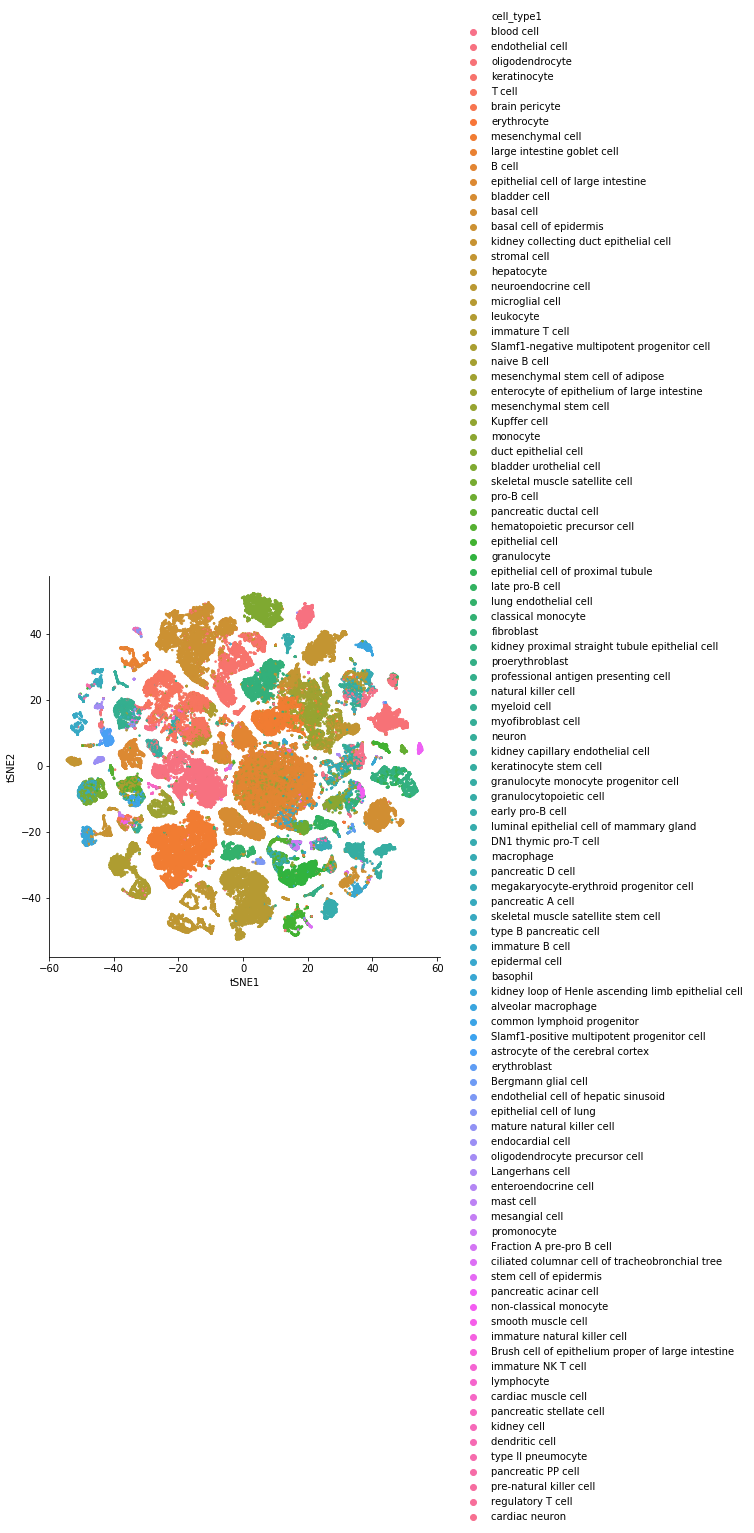

In [16]:
plot = tabula_muris.visualize_latent("cell_type1")
plot.get_figure().savefig("ALIGNED_Tabula_Muris/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


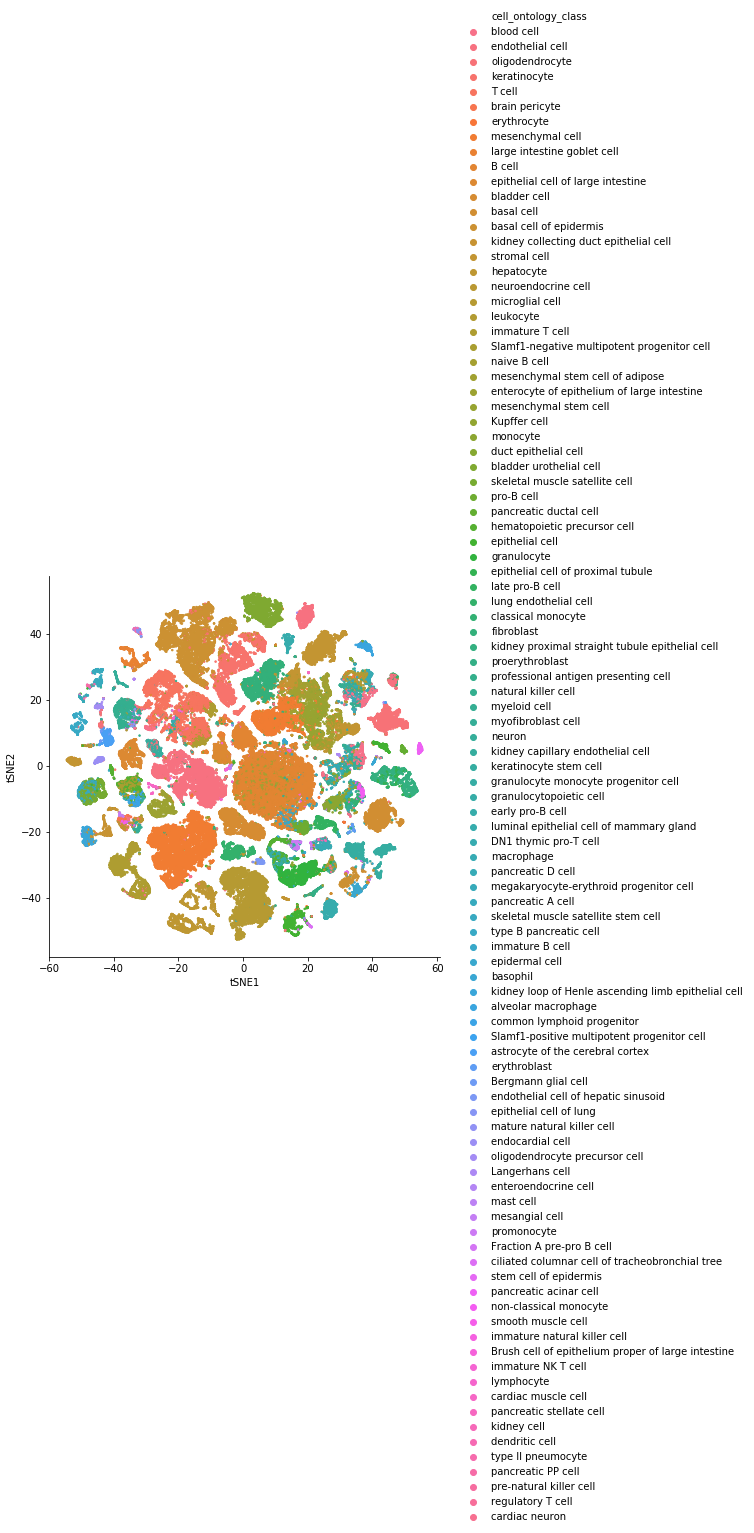

In [17]:
plot = tabula_muris.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("ALIGNED_Tabula_Muris/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


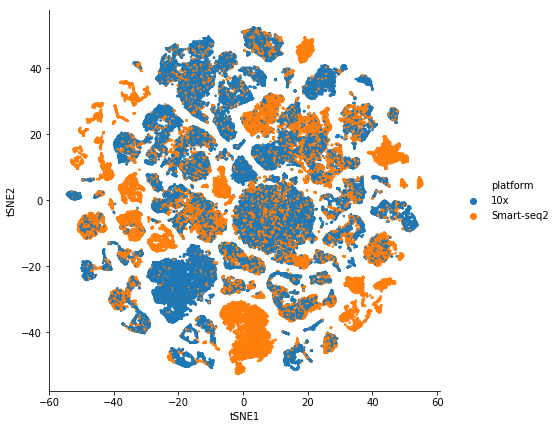

In [18]:
plot = tabula_muris.visualize_latent("platform")
plot.get_figure().savefig("ALIGNED_Tabula_Muris/platform.pdf", bbox_inches="tight")

In [19]:
%%capture capio
tabula_muris_models = [tabula_muris_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    tabula_muris_models.append(cb.directi.fit_DIRECTi(
        tabula_muris, tabula_muris.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/ALIGNED_Tabula_Muris/model_%d" % i
    ))
tabula_muris_blast = cb.blast.BLAST(
    tabula_muris_models, tabula_muris, keep_exprs=True
).build_empirical()
tabula_muris_blast.save("ALIGNED_Tabula_Muris")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Tabula_Muris/model_1/checkpoint-210
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Tabula_Muris/model_2/checkpoint-150
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Tabula_Muris/model_3/checkpoint-97


In [20]:
with open("ALIGNED_Tabula_Muris/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("ALIGNED_Tabula_Muris/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [21]:
utils.self_projection(tabula_muris_blast, "ALIGNED_Tabula_Muris")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9675
Accuracy = 0.9504
